In [226]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Data Understanding

In [227]:
weather_data = pd.read_csv('D:\\Datasets\\advanced_synthetic_weather_data.csv')
weather_data.head()

,date,temperature,humidity,wind_speed,pressure,solar_radiation
0,2020-01-01,28.973713,NaN,NaN,1005.300039,26.135177
1,2020-01-02,23.893886,36.27407,6.239218,1000.038833,201.520446
2,2020-01-03,30.181508,NaN,NaN,1008.438792,26.442687
3,2020-01-04,37.184239,NaN,NaN,1014.814266,14.629363
4,2020-01-05,23.126773,NaN,NaN,1018.950295,480.325353


In [228]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1000 non-null   object 
 1   temperature      1000 non-null   float64
 2   humidity         820 non-null    float64
 3   wind_speed       820 non-null    float64
 4   pressure         1000 non-null   float64
 5   solar_radiation  1000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [229]:
weather_data.describe()

,temperature,humidity,wind_speed,pressure,solar_radiation
count,1000.000000,820.000000,820.000000,1000.000000,1000.000000
mean,25.154656,60.101123,10.081697,1012.884721,200.062700
std,7.833728,17.347338,4.847262,10.373546,199.485628
min,-0.930139,30.193096,-5.097561,983.088640,0.188772
25%,19.819278,44.365659,6.815539,1005.718741,57.327617
50%,25.202405,61.124034,10.017678,1012.687509,132.885675
75%,30.183551,74.247145,13.283685,1019.829291,275.501096
max,55.821852,89.964824,25.688743,1052.262377,1467.800113


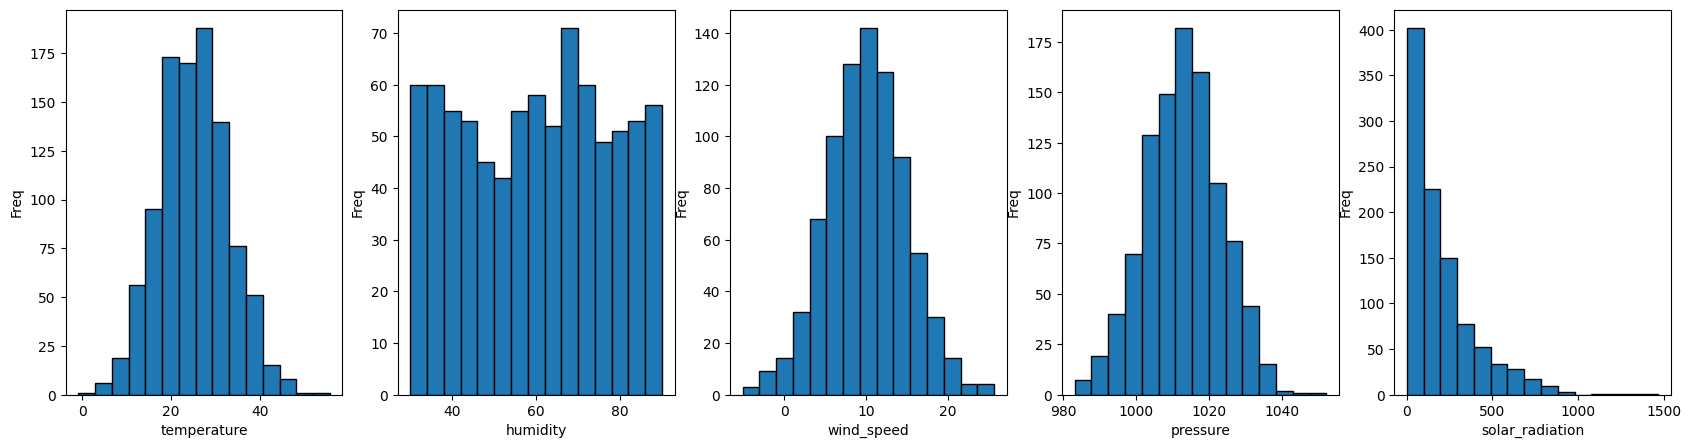

In [230]:
Numeric_columns = weather_data.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(25,5))
for i , col in enumerate(Numeric_columns):
    plt.subplot(1,6,i+1)
    plt.hist(weather_data[col] , edgecolor='k' , bins=15)
    plt.xlabel(col)
    plt.ylabel('Freq')
plt.show()

In [231]:
threshold = weather_data['temperature'].quantile(0.75)
def catogry_day(temp):
    if temp>=threshold:
        return 'Hot'
    else:
        return 'Cold'
weather_data['Day state'] = weather_data['temperature'].apply(catogry_day)
weather_data.head()

,date,temperature,humidity,wind_speed,pressure,solar_radiation,Day state
0,2020-01-01,28.973713,NaN,NaN,1005.300039,26.135177,Cold
1,2020-01-02,23.893886,36.27407,6.239218,1000.038833,201.520446,Cold
2,2020-01-03,30.181508,NaN,NaN,1008.438792,26.442687,Cold
3,2020-01-04,37.184239,NaN,NaN,1014.814266,14.629363,Hot
4,2020-01-05,23.126773,NaN,NaN,1018.950295,480.325353,Cold


# Checking Data Types

In [232]:
dtypes = weather_data.dtypes
unumber = weather_data.nunique()
pd.DataFrame({'Data Type':dtypes , '# of uniques':unumber}).T

,date,temperature,humidity,wind_speed,pressure,solar_radiation,Day state
Data Type,object,float64,float64,float64,float64,float64,object
# of uniques,1000,1000,820,820,1000,1000,2


In [233]:
col=['Day state']
weather_data[col]=weather_data[col].astype('category')
dtypes = weather_data.dtypes
unumber = weather_data.nunique()
pd.DataFrame({'Data Type':dtypes , '# of uniques':unumber}).T

,date,temperature,humidity,wind_speed,pressure,solar_radiation,Day state
Data Type,object,float64,float64,float64,float64,float64,category
# of uniques,1000,1000,820,820,1000,1000,2


In [234]:
weather_data.drop(['date'] , axis=1 , inplace=True)
weather_data.head()

,temperature,humidity,wind_speed,pressure,solar_radiation,Day state
0,28.973713,NaN,NaN,1005.300039,26.135177,Cold
1,23.893886,36.27407,6.239218,1000.038833,201.520446,Cold
2,30.181508,NaN,NaN,1008.438792,26.442687,Cold
3,37.184239,NaN,NaN,1014.814266,14.629363,Hot
4,23.126773,NaN,NaN,1018.950295,480.325353,Cold


# Handling Missing/Null values

In [235]:
nulls = weather_data.isnull().sum()
pd.DataFrame({'Nulls':nulls}).T

,temperature,humidity,wind_speed,pressure,solar_radiation,Day state
Nulls,0,180,180,0,0,0


In [236]:
wind_mean = np.mean(weather_data['wind_speed'])
wind_mean
weather_data['wind_speed'].fillna(wind_mean,inplace=True)

In [237]:
humidity_mean = np.mean(weather_data['humidity'])
humidity_mean
weather_data['humidity'].fillna(humidity_mean,inplace=True)

In [238]:
nulls = weather_data.isnull().sum()
pd.DataFrame({'Nulls':nulls}).T

,temperature,humidity,wind_speed,pressure,solar_radiation,Day state
Nulls,0,0,0,0,0,0


# Handling Outliers

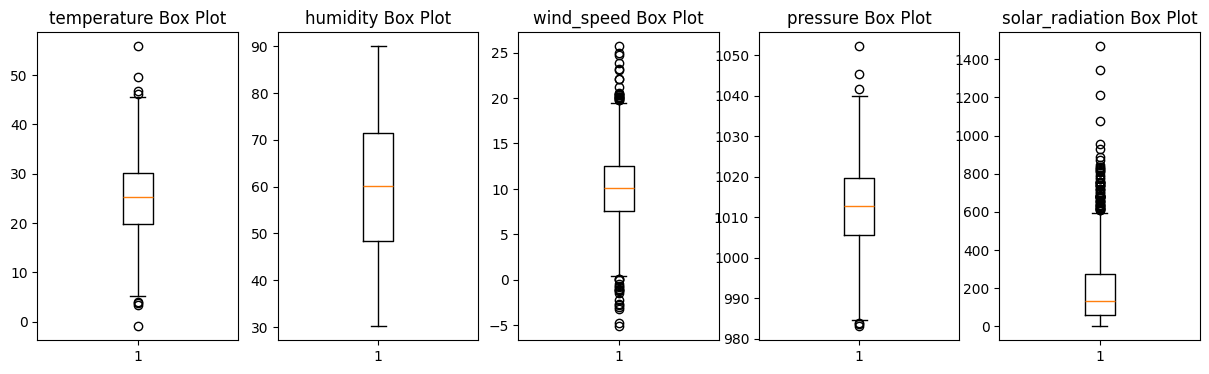

In [239]:
Numeric_columns = weather_data.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(15,4))
for i , col in enumerate(Numeric_columns):
    plt.subplot(1,5,i+1)
    plt.boxplot(weather_data[col])
    plt.title(f'{col} Box Plot')
plt.show()    

In [240]:
for col in Numeric_columns:
    Q1 = weather_data[col].quantile(0.25)
    Q3 = weather_data[col].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Fennse = Q3 + (1.5*IQR)
    lower_fennse = Q1 - (1.5*IQR)
    Low_Outlier = weather_data[weather_data[col] < lower_fennse][col].values
    Up_Outlier = weather_data[weather_data[col] > Upper_Fennse][col].values
    weather_data[col].replace(Low_Outlier , lower_fennse , inplace=True)
    weather_data[col].replace(Up_Outlier , Upper_Fennse , inplace=True)

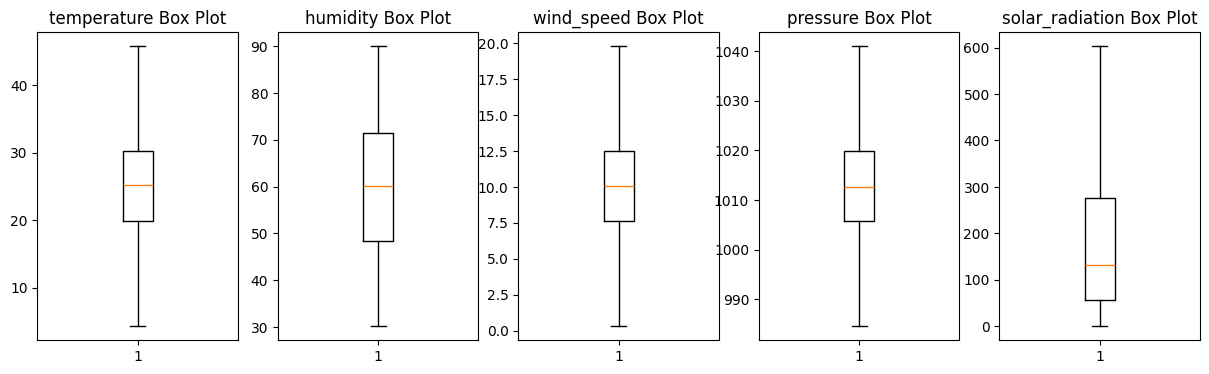

In [241]:
Numeric_columns = weather_data.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(15,4))
for i , col in enumerate(Numeric_columns):
    plt.subplot(1,5,i+1)
    plt.boxplot(weather_data[col])
    plt.title(f'{col} Box Plot')
plt.show()    

# Visualizations

>> Numeric Data Distribution

#Histogram

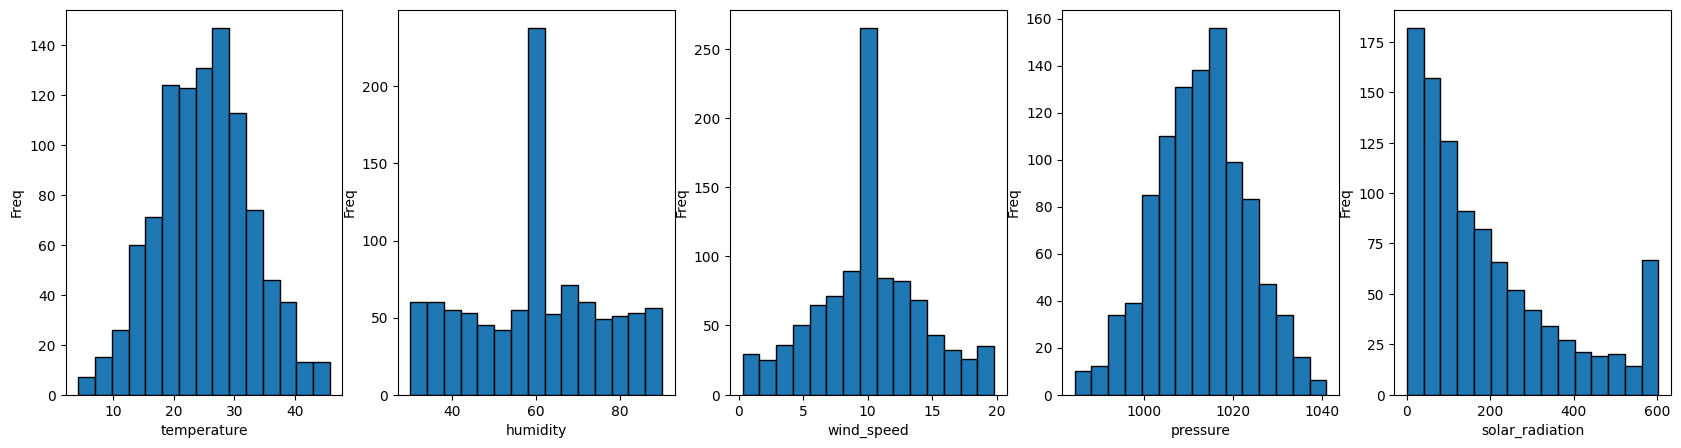

In [242]:
Numeric_columns = weather_data.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(25,5))
for i , col in enumerate(Numeric_columns):
    plt.subplot(1,6,i+1)
    plt.hist(weather_data[col] , edgecolor='k' , bins=15)
    plt.xlabel(col)
    plt.ylabel('Freq')
plt.show()

#KDE

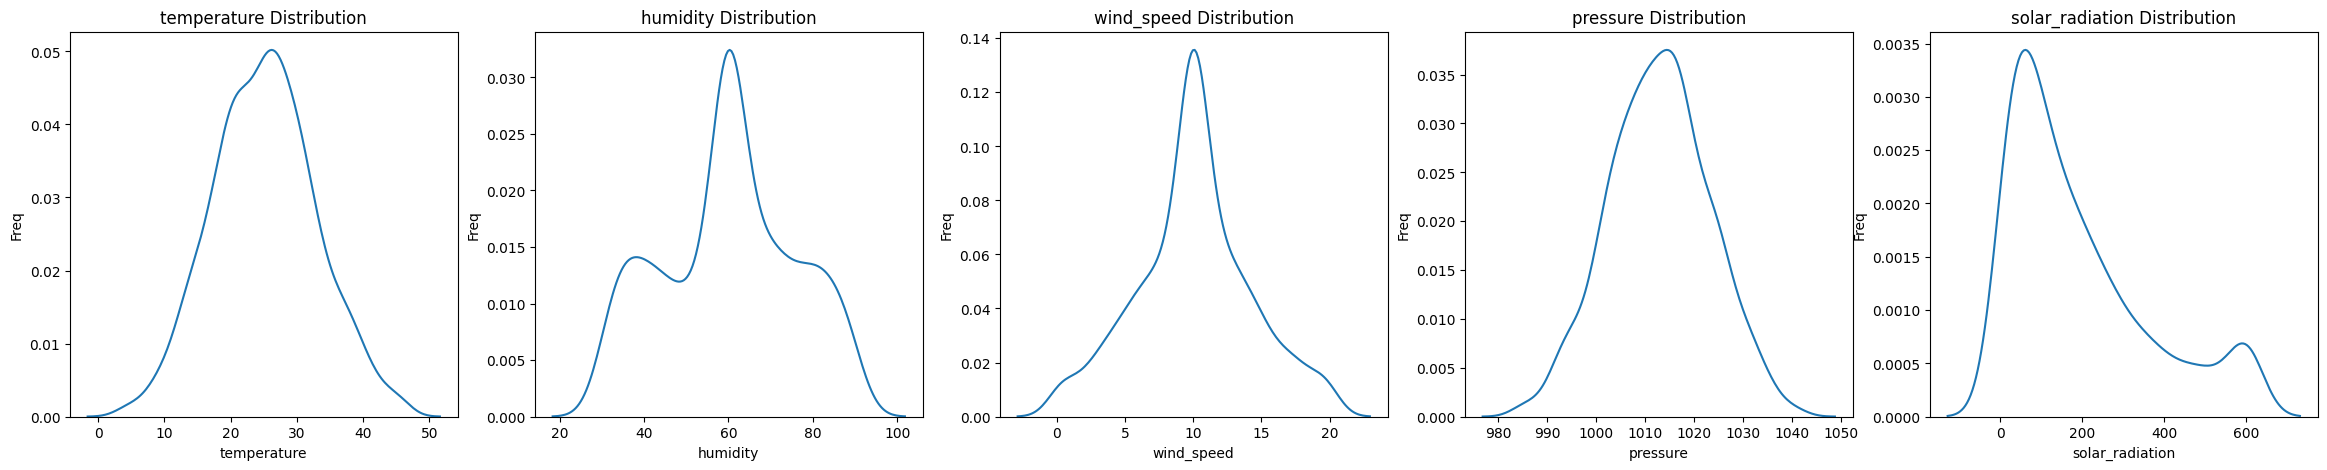

In [243]:
Numeric_columns = weather_data.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(35,5))
for i , col in enumerate(Numeric_columns):
    plt.subplot(1,6,i+1)
    sns.kdeplot(weather_data[col] )
    plt.xlabel(col)
    plt.ylabel('Freq')
    plt.title(f'{col} Distribution')
plt.show()

>> catogrical Data Distribution 

#(count plot)

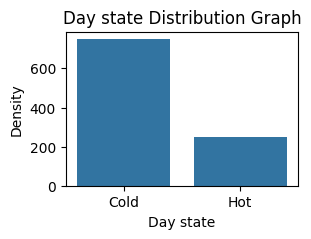

In [244]:
strCol = weather_data.select_dtypes('category').columns
plt.figure(figsize=(3, 2))
for i, col in enumerate(strCol):
    plt.subplot(1, 1, i+1)
    sns.countplot(x=col, data=weather_data)
    plt.xlabel(f"{col}")
    plt.ylabel('Density')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

#pie plot

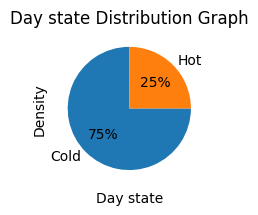

In [245]:
numCol = weather_data.select_dtypes('category').columns
plt.figure(figsize=(5, 2))
for i, col in enumerate(numCol):
    plt.subplot(1, 1, i+1)
    unique = weather_data[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels=categories, autopct="%1.1d%%", startangle=90)
    plt.xlabel(f"{col}")
    plt.ylabel('Density')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

# Removing Dublicates

In [246]:
weather_data.duplicated().sum()

0

# Data spliting

In [247]:
x=weather_data.drop(['Day state'] , axis=1)
y=weather_data[['Day state']]

In [248]:
x.head()

,temperature,humidity,wind_speed,pressure,solar_radiation
0,28.973713,60.101123,10.081697,1005.300039,26.135177
1,23.893886,36.274070,6.239218,1000.038833,201.520446
2,30.181508,60.101123,10.081697,1008.438792,26.442687
3,37.184239,60.101123,10.081697,1014.814266,14.629363
4,23.126773,60.101123,10.081697,1018.950295,480.325353


In [249]:
y.head()

,Day state
0,Cold
1,Cold
2,Cold
3,Hot
4,Cold


# Normalization

In [250]:
from sklearn.preprocessing import MinMaxScaler
numCol = weather_data.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(weather_data[numCol])
weather_data[numCol] = scaler.transform(weather_data[numCol])
weather_data.head(10)

,temperature,humidity,wind_speed,pressure,solar_radiation,Day state
0,0.595817,0.500371,0.501637,0.367582,0.043059,Cold
1,0.473285,0.101737,0.304385,0.274368,0.334120,Cold
2,0.624951,0.500371,0.501637,0.423192,0.043570,Cold
3,0.793866,0.500371,0.501637,0.536148,0.023965,Hot
4,0.454781,0.500371,0.501637,0.609427,0.796811,Cold
5,0.454784,0.936557,0.526968,0.405244,0.069680,Cold
6,0.804708,0.048939,0.456341,0.430832,0.571159,Hot
7,0.648058,0.540133,0.669759,0.339818,0.260783,Hot
8,0.409371,0.708538,0.552165,0.498434,0.026590,Cold
9,0.604664,0.871065,0.304433,0.353686,1.000000,Cold


# Encoding 

In [251]:
weather_data['Day state'].replace(weather_data['Day state'].unique(), [0,1], inplace=True)
weather_data.head()


,temperature,humidity,wind_speed,pressure,solar_radiation,Day state
0,0.595817,0.500371,0.501637,0.367582,0.043059,0
1,0.473285,0.101737,0.304385,0.274368,0.334120,0
2,0.624951,0.500371,0.501637,0.423192,0.043570,0
3,0.793866,0.500371,0.501637,0.536148,0.023965,1
4,0.454781,0.500371,0.501637,0.609427,0.796811,0


# Implemntation With (Regression)

>>Linear Regression

In [252]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Selecting features and target
x=weather_data.drop(['Day state'] , axis=1)
y=weather_data['Day state']

# Splitting the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=20)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(x_train , y_train)

# Making predictions
Lr_predict = model.predict(x_test)
Real_Vs_Predict = pd.DataFrame({'Real': y_test, 'predicted': np.round(Lr_predict)})


# Evaluating the model
mse = mean_squared_error(y_test,Lr_predict)
mae = mean_absolute_error(y_test, Lr_predict)
r2 = r2_score(y_test, Lr_predict)

# Results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
Real_Vs_Predict.corr()



Mean Squared Error: 0.09280253943815435
Mean Absolute Error: 0.264806010962878
R² Score: 0.5176583189285118


,Real,predicted
Real,1.000000,0.849021
predicted,0.849021,1.000000


>>Plynomial Regression

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Selecting features and target
x=weather_data.drop(['Day state'] , axis=1)
y=weather_data['Day state']


# Creating polynomial features 
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)


# Splitting the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x_poly , y , test_size=0.25 , random_state=30)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(x_train , y_train)

# Making predictions
Pr_predict = model.predict(x_test)
Real_Vs_Predict = pd.DataFrame({'Real': y_test, 'predicted': np.round(Pr_predict)})


# Evaluating the model
mse = mean_squared_error(y_test, Pr_predict)
mae = mean_absolute_error(y_test, Pr_predict)
r2 = r2_score(y_test, Pr_predict)

# Results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
Real_Vs_Predict.corr()



Mean Squared Error: 0.046530288123822726
Mean Absolute Error: 0.1593438050015546
R² Score: 0.7628135545437631


,Real,predicted
Real,1.000000,0.907362
predicted,0.907362,1.000000


>>Logistic Regression

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error , r2_score 

# Example data
X = weather_data.drop(['Day state'] , axis=1)
y = weather_data['Day state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)


# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


# Make predictions
Lor_predict = model.predict(X_test)
Real_Vs_Predict = pd.DataFrame({'Real': y_test, 'predicted': np.round(Lor_predict)})



# Evaluate the model
MSE = mean_squared_error(y_test, Lor_predict)
MAE = mean_absolute_error(y_test, Lor_predict)
R2 = r2_score(y_test, Lor_predict)


# Results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
Real_Vs_Predict.corr()



Mean Squared Error: 0.046530288123822726
Mean Absolute Error: 0.1593438050015546
R² Score: 0.7628135545437631


,Real,predicted
Real,1.000000,0.812782
predicted,0.812782,1.000000


# Implemntation With (Classification)

>>Logistic Regression(binary classification)

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error , r2_score 

# Example data
X = weather_data.drop(['Day state'] , axis=1)
y = weather_data['Day state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


# Make predictions
Lorc_predict = model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, Lorc_predict)
MSE = mean_squared_error(y_test, Lorc_predict)
MAE = mean_absolute_error(y_test, Lorc_predict)
R2 = r2_score(y_test, Lorc_predict)

Results = pd.DataFrame({'Accuracy in %':accuracy*100 , 'Mean Squared Error':MSE , 'Mean Absolute Error':MAE , 'R² Score':R2} , index=['Result'])
Results

,Accuracy in %,Mean Squared Error,Mean Absolute Error,R² Score
Result,92.0,0.08,0.08,0.5842


>>KNN

Accuracy in % = 90.0
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       184
           1       0.86      0.74      0.80        66

    accuracy                           0.90       250
   macro avg       0.89      0.85      0.87       250
weighted avg       0.90      0.90      0.90       250



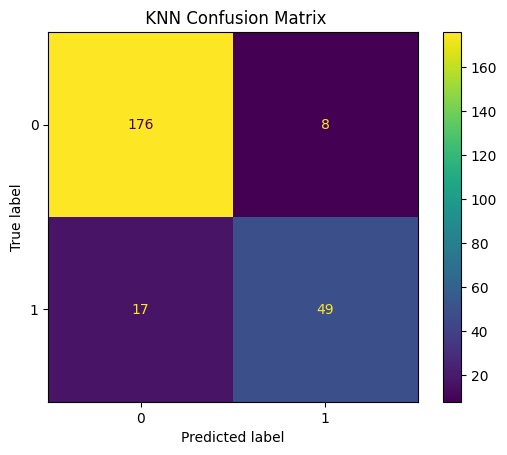

In [256]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , ConfusionMatrixDisplay


X = weather_data.drop(['Day state'] , axis=1)
y = weather_data['Day state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)


# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict the labels for the test set
knn_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, knn_pred)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, knn_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, knn_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()
plt.title(' KNN Confusion Matrix')
plt.show()


>>SVM

Accuracy in % = 98.4
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       184
           1       1.00      0.94      0.97        66

    accuracy                           0.98       250
   macro avg       0.99      0.97      0.98       250
weighted avg       0.98      0.98      0.98       250



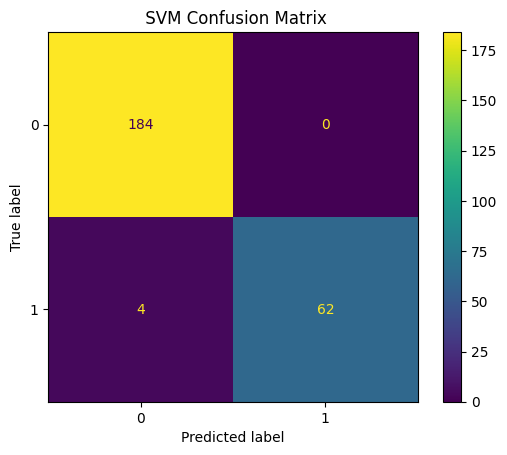

In [257]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,  ConfusionMatrixDisplay



X = weather_data.drop(['Day state'] , axis=1)
y = weather_data['Day state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Create an SVM classifier (using the RBF kernel) for all 6 features
svm_classifier = SVC(kernel='rbf', C=1000, gamma=0.1)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, svm_pred)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, svm_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test,svm_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=svm_classifier.classes_)
disp.plot()
plt.title(' SVM Confusion Matrix')
plt.show()

>>Decision Tree

Accuracy in % = 99.6
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       184
           1       1.00      0.98      0.99        66

    accuracy                           1.00       250
   macro avg       1.00      0.99      0.99       250
weighted avg       1.00      1.00      1.00       250



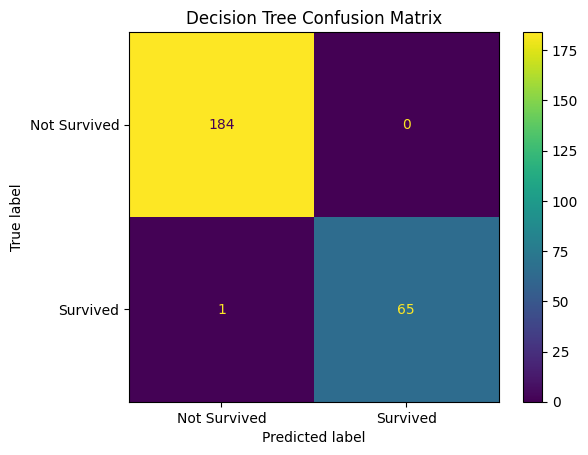

In [258]:
from sklearn.tree import DecisionTreeClassifier

X = weather_data.drop(['Day state'] , axis=1)
y = weather_data['Day state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Create a Decision Tree classifier (you can adjust hyperparameters)
model = DecisionTreeClassifier() # DecisionTreeClassifier(criterion='entropy')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
Dt_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, Dt_pred)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, Dt_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, Dt_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['Not Survived', 'Survived'])
disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()




# Ensemble Models (Bagging , Bosting)

>> Bagging classifier

Accuracy in % = 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



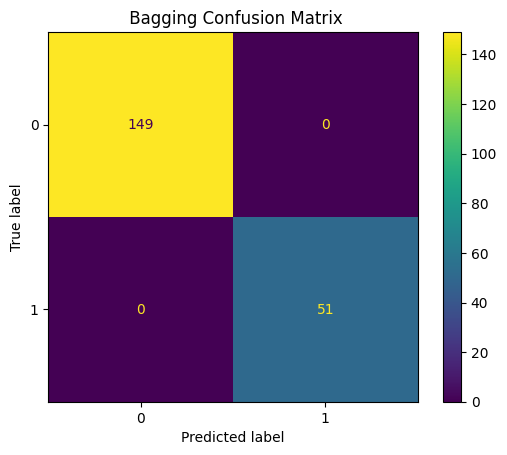

In [259]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


X = weather_data.drop(['Day state'] , axis=1)
y = weather_data['Day state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)


baggingModel = BaggingClassifier(base_estimator=DecisionTreeClassifier() , n_estimators=100 , random_state=42)
baggingModel.fit(X_train , y_train)
bagging_predict = baggingModel.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, bagging_predict)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, bagging_predict))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, bagging_predict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix , display_labels=baggingModel.classes_)
disp.plot()
plt.title(' Bagging Confusion Matrix')
plt.show()




>> Boosting classifier

Accuracy in % = 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



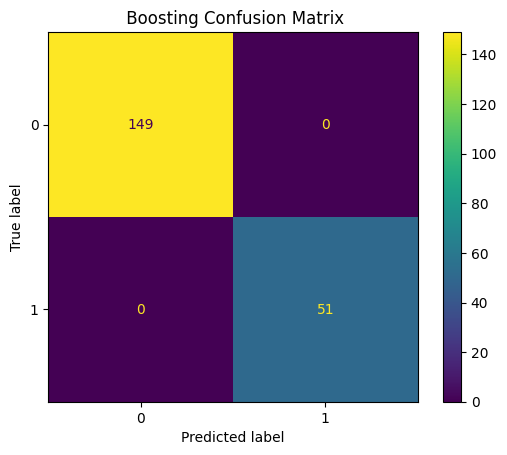

In [260]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Splitting data
X = weather_data.drop(['Day state'] , axis=1)
y = weather_data['Day state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)


boostingModel = AdaBoostClassifier(base_estimator=DecisionTreeClassifier() , n_estimators=100 , random_state=42)
boostingModel.fit(X_train , y_train)
boosting_predict = boostingModel.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, boosting_predict)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, boosting_predict))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, boosting_predict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix , display_labels=boostingModel.classes_)
disp.plot()
plt.title(' Boosting Confusion Matrix')
plt.show()




# Random Forest Algorithm

Accuracy in % = 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



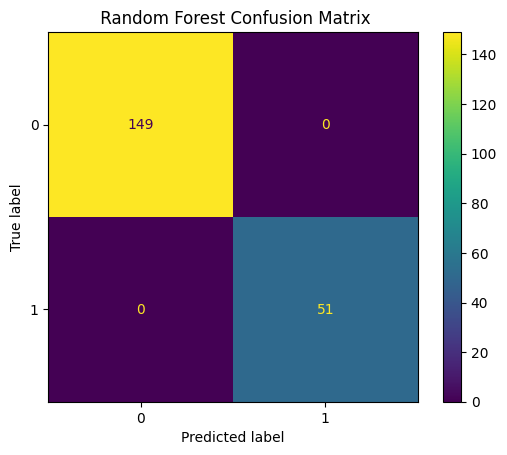

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Splitting data
X = weather_data.drop(['Day state'] , axis=1)
y = weather_data['Day state']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)


R_model = RandomForestClassifier(n_estimators=100 , random_state=42)
R_model.fit(X_train , y_train )

R_predict = R_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, R_predict)
print(f'Accuracy in % = {accuracy * 100}')

# Display classification report
print(classification_report(y_test, R_predict))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, R_predict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix , display_labels=R_model.classes_)
disp.plot()
plt.title(' Random Forest Confusion Matrix')
plt.show()
